# LISTA 1

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew, binom, multinomial
from statsmodels.graphics.mosaicplot import mosaic
import plot_likert

## CZĘŚĆ I

### ZADANIE 1

#### ZADANIE 1.1
    Wczytaj dane i przygotuj je do analizy. Zadbaj o odpowiednie typy zmiennych, zweryfikuj czy przyjmują wartości zgodne z powyższym opisem, zbadaj czy nie występują braki w danych.

In [87]:
data = pd.read_csv('ankieta.csv', encoding='Windows-1250', sep=';')
data.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK
0,IT,2,Nie,1,-2,1,M,64
1,IT,2,Nie,0,-2,-2,M,67
2,IT,2,Nie,1,2,2,M,65
3,IT,2,Nie,-1,-2,-2,K,68
4,IT,3,Tak,1,2,-1,K,65


-> Czy występują braki danych? NIE

In [88]:
data.isnull().sum()

DZIAŁ       0
STAŻ        0
CZY_KIER    0
PYT_1       0
PYT_2       0
PYT_3       0
PŁEĆ        0
WIEK        0
dtype: int64

-> Typy zmiennych

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAŁ     200 non-null    object
 1   STAŻ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PŁEĆ      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


In [90]:
data['DZIAŁ'] = data['DZIAŁ'].astype("category")
data['CZY_KIER'] = data['CZY_KIER'].astype("category")
data['PŁEĆ'] = data['PŁEĆ'].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DZIAŁ     200 non-null    category
 1   STAŻ      200 non-null    int64   
 2   CZY_KIER  200 non-null    category
 3   PYT_1     200 non-null    int64   
 4   PYT_2     200 non-null    int64   
 5   PYT_3     200 non-null    int64   
 6   PŁEĆ      200 non-null    category
 7   WIEK      200 non-null    int64   
dtypes: category(3), int64(5)
memory usage: 9.0 KB


#### ZADANIE 1.2
    Utwórz zmienną WIEK_KAT przeprowadzając kategoryzację zmiennej WIEK korzystając z następujących przedziałów: do 35 lat, mięedzy 36 a 45 lat, między 46 a 55 lat, powyżej 55 lat.


In [91]:
def categorize_age(age):
    if age <= 35:
        return "<=35"
    elif 36 <= age <= 45:
        return "36-45"
    elif 46 <= age <= 55:
        return "46-55"
    else:
        return ">55"

data["WIEK_KAT"] = data["WIEK"].apply(categorize_age)

In [92]:
data.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT
0,IT,2,Nie,1,-2,1,M,64,>55
1,IT,2,Nie,0,-2,-2,M,67,>55
2,IT,2,Nie,1,2,2,M,65,>55
3,IT,2,Nie,-1,-2,-2,K,68,>55
4,IT,3,Tak,1,2,-1,K,65,>55


#### ZADANIE 1.3
    Sporządź tablice liczności dla zmiennych: DZIAŁ, STAŻ, CZY_KIER, PŁEĆ, WIEK_KAT. Sformułuj wnioski.

In [93]:
variables = ["DZIAŁ", "STAŻ", "CZY_KIER", "PŁEĆ", "WIEK_KAT"]
for var in variables:
    print(data[var].value_counts())

DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64
STAŻ
2    140
1     41
3     19
Name: count, dtype: int64
CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64
PŁEĆ
M    129
K     71
Name: count, dtype: int64
WIEK_KAT
36-45    104
46-55     45
<=35      26
>55       25
Name: count, dtype: int64


#### ZADANIE 1.4
     Sporządź wykresy kołowe oraz wykresy słupkowe dla zmiennych: PYT_1 oraz PYT_2. Sformułuj wnioski.

In [94]:
pyt1_value = data["PYT_1"].value_counts()
pyt2_value = data["PYT_2"].value_counts()

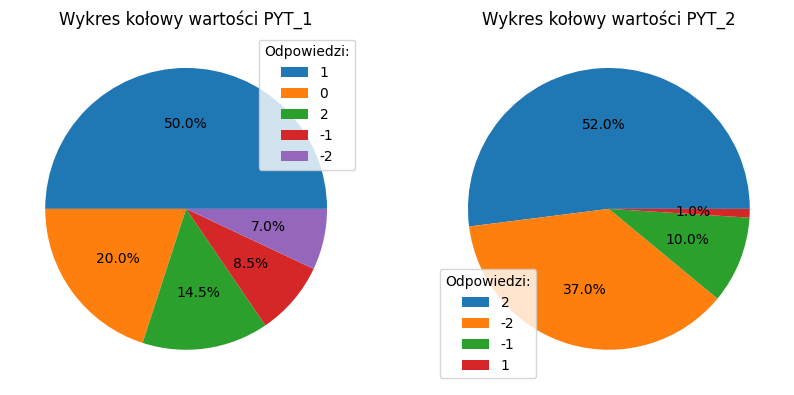

In [124]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.pie(pyt1_value, autopct="%.1f%%")
plt.title('Wykres kołowy wartości PYT_1')
plt.legend(title='Odpowiedzi:', labels=pyt1_value.index)

plt.subplot(1,2,2)
plt.pie(pyt2_value, autopct="%.1f%%")
plt.title('Wykres kołowy wartości PYT_2')
plt.legend(title='Odpowiedzi:', labels=pyt2_value.index)

plt.show()

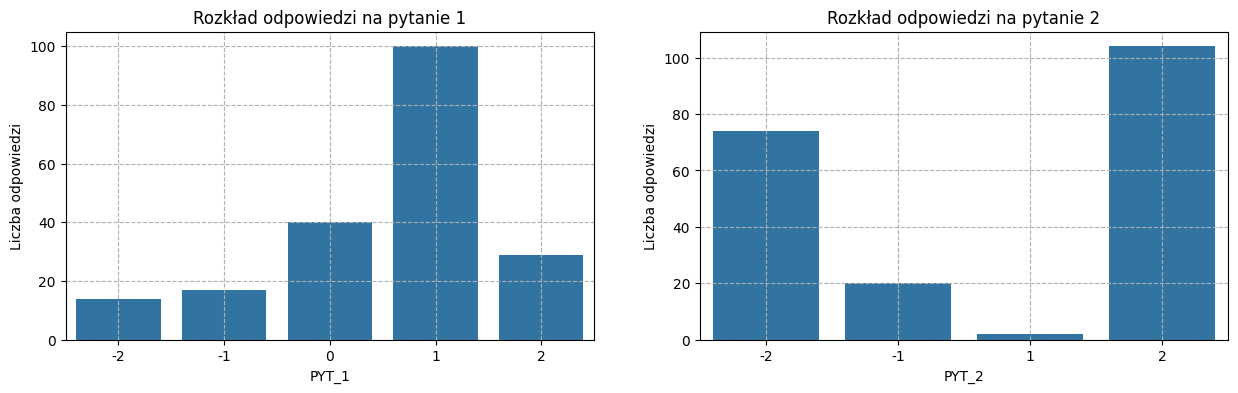

In [96]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.countplot(x="PYT_1", data=data)
plt.title('Rozkład odpowiedzi na pytanie 1')
plt.ylabel('Liczba odpowiedzi')
plt.grid(True, linestyle='--')

plt.subplot(1,2,2)
sns.countplot(x="PYT_2", data=data)
plt.title('Rozkład odpowiedzi na pytanie 2')
plt.ylabel('Liczba odpowiedzi')
plt.grid(True, linestyle='--')

plt.show()

#### ZADANIE 1.5
    Sporządź tablice wielodzielcze dla par zmiennych: PYT_1 i DZIAŁ, PYT_1 i STAŻ, PYT_1 i CZY_KIER, PYT_1 i PŁEĆ oraz PYT_1 i WIEK_KAT. Sformułuj wnioski.

In [97]:
crosstab_P1D = pd.crosstab(data['PYT_1'], data['DZIAŁ'], margins = False) 
crosstab_P1S = pd.crosstab(data['PYT_1'], data['STAŻ'], margins = False) 
crosstab_P1CzK = pd.crosstab(data['PYT_1'], data['CZY_KIER'], margins = False) 
crosstab_P1P = pd.crosstab(data['PYT_1'], data['PŁEĆ'], margins = False) 
crosstab_P1WK = pd.crosstab(data['PYT_1'], data['WIEK_KAT'], margins = False) 

In [98]:
crosstab_P1D

DZIAŁ,HR,IT,MK,PD
PYT_1,,,,
-2,2,0,3,9
-1,2,2,3,10
0,5,4,14,17
1,19,15,15,51
2,3,5,10,11


In [99]:
crosstab_P1S

STAŻ,1,2,3
PYT_1,,,
-2,5,5,4
-1,6,10,1
0,8,26,6
1,19,75,6
2,3,24,2


In [100]:
crosstab_P1CzK

CZY_KIER,Nie,Tak
PYT_1,,
-2,10,4
-1,14,3
0,34,6
1,88,12
2,27,2


In [101]:
crosstab_P1P

PŁEĆ,K,M
PYT_1,,
-2,3,11
-1,7,10
0,14,26
1,36,64
2,11,18


In [102]:
crosstab_P1WK

WIEK_KAT,36-45,46-55,<=35,>55
PYT_1,,,,
-2,11,2,1,0
-1,7,1,6,3
0,24,5,3,8
1,50,25,13,12
2,12,12,3,2


#### ZADANIE 1.6
    Sporządź tablicę wielodzielczą dla pary zmiennych: PYT_2 i PYT_3. Sformułuj wnioski.

In [103]:
crosstab_P2P3 = pd.crosstab(data['PYT_2'], data['PYT_3'], margins = False) 
crosstab_P2P3

PYT_3,-2,-1,1,2
PYT_2,,,,
-2,49,16,5,4
-1,3,6,10,1
1,0,0,2,0
2,0,8,15,81


#### ZADANIE 1.7
     Utwórz zmienną CZY_ZADOW na podstawie zmiennej PYT_2 łącząc kategorie "nie zgadzam się" i "zdecydowanie się nie zgadzam" oraz "zgadzam się" i "zdecydowanie się zgadzam".

In [104]:
def is_satisfied(satisfaction_lvl):
    if satisfaction_lvl == -2 or satisfaction_lvl == -1:
        return 'NIE'
    else:
        return 'TAK'

data["CZY_ZADOW"] = data["PYT_2"].apply(is_satisfied)

In [105]:
data.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
0,IT,2,Nie,1,-2,1,M,64,>55,NIE
1,IT,2,Nie,0,-2,-2,M,67,>55,NIE
2,IT,2,Nie,1,2,2,M,65,>55,TAK
3,IT,2,Nie,-1,-2,-2,K,68,>55,NIE
4,IT,3,Tak,1,2,-1,K,65,>55,TAK


#### ZADANIE 1.8
    Sporządź wykresy mozaikowe odpowiadające parom zmiennych: CZY_ZADOW i DZIAŁ, CZY_ZADOW i STAŻ, CZY_ZADOW i CZY_KIER, CZY_ZADOW i PŁEĆ oraz CZY_ZADOW i WIEK_KAT. Czy na podstawie uzyskanych wykresów można postawić pewne hipotezy dotyczące realicji między powyższymi zmiennymi? Spróbuj sformułować kilka takich hipotez.

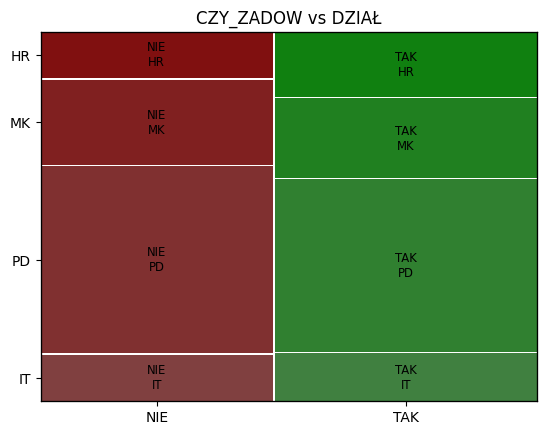

In [106]:
mosaic(data, ['CZY_ZADOW', 'DZIAŁ'], title='CZY_ZADOW vs DZIAŁ')
plt.show()

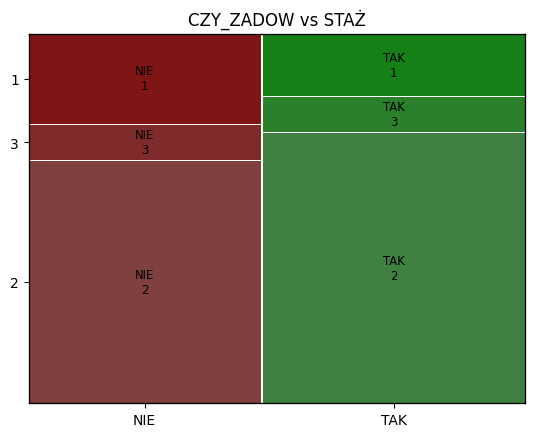

In [107]:
mosaic(data, ['CZY_ZADOW', 'STAŻ'], title='CZY_ZADOW vs STAŻ')
plt.show()

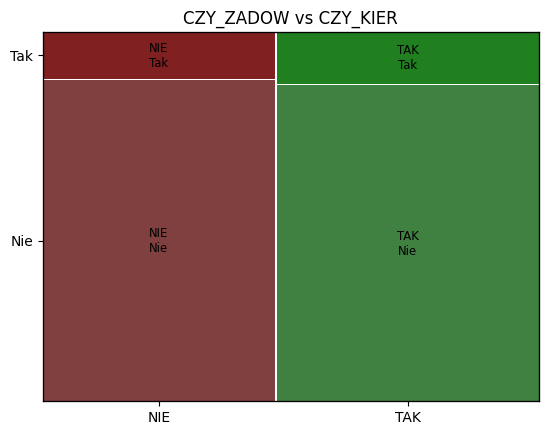

In [108]:
mosaic(data, ['CZY_ZADOW', 'CZY_KIER'], title='CZY_ZADOW vs CZY_KIER')
plt.show()

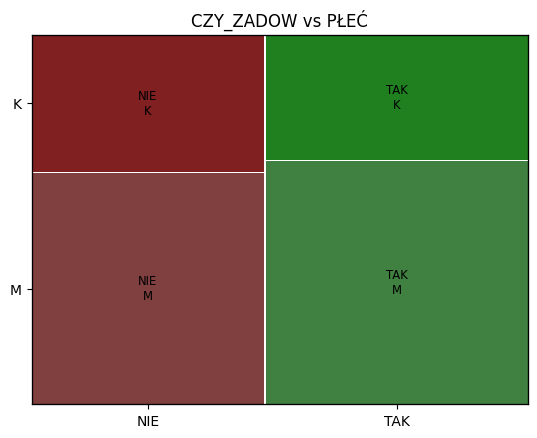

In [109]:
mosaic(data, ['CZY_ZADOW', 'PŁEĆ'], title='CZY_ZADOW vs PŁEĆ')
plt.show()

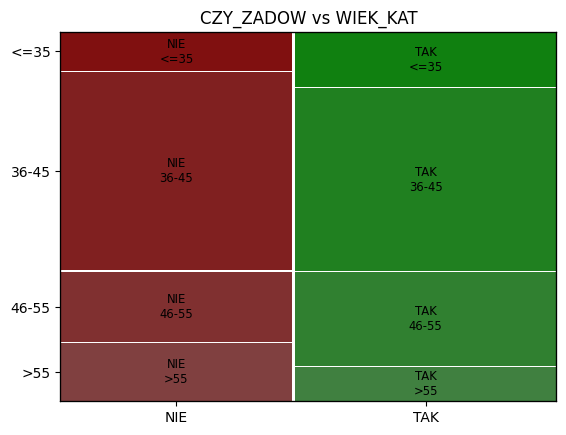

In [110]:
mosaic(data, ['CZY_ZADOW', 'WIEK_KAT'], title='CZY_ZADOW vs WIEK_KAT')
plt.show()

## CZĘŚĆ II

### ZADANIE 2 
    Zilustruj odpowiedzi na pytanie "Jak bardzo zgadzasz się ze stwierdzeniem, że firma pozwala na (...)?" (zmienna PYT_1) w całej badanej grupie oraz w podgrupach ze względu na zmienną CZY_KIER. W tym celu możesz zaproponować własne metody wizualizacji lub zapozać się z biblioteką likert i dostępnymi tam funkcjami summary oraz plot (jeśli korzystarz z R) oraz z biblioteką Altair lub plot-likert (jeśli korzystarz z Pythona).

### ZADANIE 3
    Zapoznaj się z funkcją sample z biblioteki stats (w R) lub z funkcją random.choice z biblioteki numpy (w Pythonie). Przetestuj jej działanie dla różnych wartości argumentów wejściowych. Następnie wylosuj próbkę o liczności 10% wszystkich rekordów z pliku "ankieta.csv" w dwóch wersjach: ze zwracaniem oraz bez zwracania.

-> Testowanie funkcji random.choice dla różnych wartości wejściowych

In [111]:
example_data = np.array([-10,-8,-6,-4,-2,0,2,4,6,8,10])
example_prob = np.array([0.1,0.05,0.2,0.02,0.03,0.3,0.025,0.025,0.05,0.1,0.1])

In [112]:
example_with_replacement = np.random.choice(example_data, size=5, replace=True)
example_with_replacement

array([-2,  4, -4, -8,  2])

In [113]:
example_without_replacement = np.random.choice(example_data, size=5, replace=False)
example_without_replacement

array([-6,  6,  2, -8,  0])

In [114]:
example_with_prob = np.random.choice(example_data, size=5, replace=True, p=example_prob)
example_with_prob

array([  0,  -2, -10,  -6,  -6])

-> Próbka o liczności 10% wszystkich rekordów z pliku 'ankieta.csv'

In [115]:
#ze zwracaniem

sample10_percent = int(0.1 * len(data))

sample_with_replacement = np.random.choice(data.index, size=sample10_percent, replace=True)
frame_with_replacement = data.loc[sample_with_replacement]
frame_with_replacement.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
25,IT,3,Nie,1,2,2,K,51,46-55,TAK
0,IT,2,Nie,1,-2,1,M,64,>55,NIE
155,MK,2,Nie,0,-2,-2,M,37,36-45,NIE
124,MK,2,Nie,1,2,2,K,40,36-45,TAK
9,IT,2,Nie,2,-1,1,K,47,46-55,NIE


In [116]:
#bez zwracania

sample_without_replacement = np.random.choice(data.index, size=sample10_percent, replace=False)
frame_without_replacement = data.loc[sample_without_replacement]
frame_without_replacement.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
5,IT,3,Tak,0,1,1,K,57,>55,TAK
13,IT,2,Nie,1,2,2,K,53,46-55,TAK
126,MK,2,Nie,1,2,2,K,36,36-45,TAK
26,PD,2,Tak,1,2,2,M,28,<=35,TAK
199,HR,2,Nie,1,2,2,K,42,36-45,TAK


### ZADANIE 4
    Zaproponuj metodę symulowania zmiennych losowych z rozkładu dwumianowego. Napisz funkcję do generowania realizacji, a następnie zaprezentuj jej działanie porównując wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartości paramertów rozkładu: n i p.

In [117]:
def binomial_simulate(n, p, size):
    return np.random.binomial(n, p, size)

In [118]:
n_binomial = 10 
p_binomial = 0.3 
size_binomial = 10000  

binomial_sample = binomial_simulate(n_binomial, p_binomial, size_binomial)

xs_binomial = np.arange(0, n_binomial)
pmf_values = binom.pmf(xs_binomial, n_binomial, p_binomial)

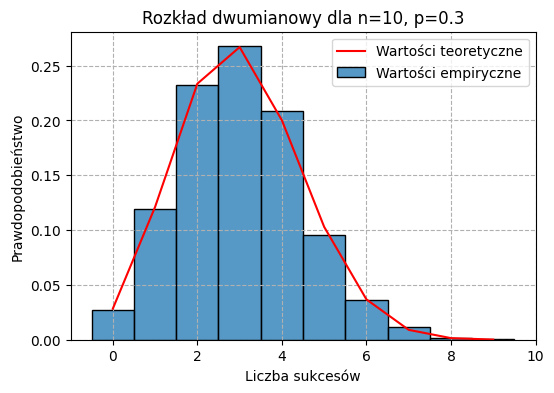

In [119]:
plt.figure(figsize=(6, 4))

sns.histplot(binomial_sample, discrete=True, stat="probability", label="Wartości empiryczne")
plt.plot(xs_binomial, pmf_values, 'r', label="Wartości teoretyczne")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo")
plt.title(f"Rozkład dwumianowy dla n={n_binomial}, p={p_binomial}")
plt.legend()
plt.grid(True, linestyle='--')

plt.show()


In [120]:
binomial_mean_teo = n_binomial * p_binomial
binomial_mean_emp = np.mean(binomial_sample)

binomial_var_teo = n_binomial * p_binomial * (1-p_binomial)
binomial_var_emp = np.var(binomial_sample)

binomial_skew_teo = (1 - 2*p_binomial)/ (np.sqrt(n_binomial*p_binomial*(1-p_binomial)))
binomial_skew_emp = skew(binomial_sample)

print('Teoretyczna wartość oczekiwana:', binomial_mean_teo)
print('Empiryczna wartość oczekiwana:', binomial_mean_emp)
print('\n')
print('Teoretyczna wariancja:', binomial_var_teo)
print('Empiryczna wariancja:', binomial_var_emp)
print('\n')
print('Teoretyczna wartość współczynnika skośności:', binomial_skew_teo)
print('Empiryczna wartość współczynnika skośności:', binomial_skew_emp)

Teoretyczna wartość oczekiwana: 3.0
Empiryczna wartość oczekiwana: 3.0108


Teoretyczna wariancja: 2.0999999999999996
Empiryczna wariancja: 2.1022833600000004


Teoretyczna wartość współczynnika skośności: 0.27602622373694174
Empiryczna wartość współczynnika skośności: 0.3105108256581161


### ZADANIE 5
    Zaproponuj metodę symulowania wektorów losowych z rozkładu wielomianowego. Napisz funkcję do generowania realizacji, a następnie zaprezentuj jej działanie porównując wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartości paramertów rozkładu: n i p.


In [121]:
def multinomial_simulate(n, p, size):
    return np.random.multinomial(n, p, size)

In [122]:
n_multinomial = 10 
p_multinomial = np.array([0.3, 0.2, 0.5])
size_multinomial = 10000  

multinomial_sample = multinomial_simulate(n_multinomial, p_multinomial, size_multinomial)


In [123]:
multinomial_mean_teo = n_multinomial * p_multinomial
multinomial_mean_emp = np.mean(multinomial_sample, axis=0)

multinomial_var_teo = n_multinomial * p_multinomial * (1-p_multinomial)
multinomial_var_emp = np.var(multinomial_sample, axis=0)

print('Teoretyczna wartość oczekiwana:', multinomial_mean_teo)
print('Empiryczna wartość oczekiwana:', multinomial_mean_emp)
print('\n')
print('Teoretyczna wariancja:', multinomial_var_teo)
print('Empiryczna wariancja:', multinomial_var_emp)

Teoretyczna wartość oczekiwana: [3. 2. 5.]
Empiryczna wartość oczekiwana: [2.9948 2.0076 4.9976]


Teoretyczna wariancja: [2.1 1.6 2.5]
Empiryczna wariancja: [2.07817296 1.59834224 2.45539424]


## CZĘŚĆ III i IV

### ZADANIE 6
    Napisz funkcję do wyznaczania realizacji przedziału ufności Cloppera-Pearsona. Niech argumentem wejściowym będzie poziom ufności, liczba sukcesów i liczba prób lub poziom ufności i wektor danych (funkcja powinna obsługiwać oba przypadki).

### ZADANIE 7
    Korzystając z funkcji napisanej w zadaniu 6. wyznacz realizacje przedziałów ufności dla prawdopodobieństwa, że pracownik uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie oraz w drugim badanym okresie. Skorzystaj ze zmiennych CZY_ZADW oraz CZY_ZADW_2 (utwórz zmienną analogicznie jak w zadaniu 1.7). Przyjmij 1−α = 0.95.

### ZADANIE 8
     Zapoznaj się z funkcjami do generowania zmiennych losowych z rozkładu dwumianowego oraz do wyznaczania przedziałów ufności dla parametru p. Przetestuj ich działanie.

### ZADANIE 9
    Przeprowadź symulacje, których celem jest porównanie prawdopodobieństwa pokrycia i długości przedziałów ufności Cloppera-Pearsona, Walda i trzeciego dowolnego typu zaimplementowanego w wybranej funkcji. Rozważ 1−α = 0.95, rozmiar próby n ∈ {30,100,1000} i różne wartości prawdopodobieństwa p. Wyniki umieść na wykresach i sformułuj wnioski, które dla konkretnych danych ułatwią wybór konkretenego typu przedziału ufności.

     * W zadaniu 8. w pakiecie R możesz skorzystać z funkcji rbinom z biblioteki stats oraz binom.confint z biblioteki binom. W Pythonie możesz skorzystać z binomial z biblioteki random oraz stats.proportion.proportion_confint z biblioteki statsmodels.

## CZĘŚĆ V

### ZADANIE 10
    Zapoznaj siĘ z funkcjami służącymi do wykonania testu dokładnego oraz asympotycznego weryfikującego hipoteze zerową dotycząca prawodopodobieństwa sukcesu z rozkładu dwumianowego. W pakiecie R możesz skorzystać z binom.test oraz prop.test z biblioteki stats, nastomiast w Pythonie użyj stats.binomtest z biblioteki scipy oraz stats.proportion.proportions_ztest z biblioteki statsmodels. Przetestuj działanie funkcji.
    

### ZADANIE 11
    Dla danych z pliku "ankieta.csv" korzystajćc z funkcji z zadania 10., przyjmując 1−α =0.95, zweryfikuj następujące hipotezy i sformułuj wnioski:
     1. Prawdopodobieństwo, że w firmie pracuje kobieta wynosi 0.5.
     2. Prawdopodbieństwo, że pracownik uważa szkolenia za przystosowane do swoich potrzeb wpierwszym badanym okresie jest większe bądź równe 0.7.
     3. Prawdopodobieństwo, że kobieta pracuje na stanowisku kierowniczym jest równe prawdopodobieństwu, że mężczczyzna pracuje na stanowisku kierowniczym.
     4. Prawdopodobieństwo, że kobieta uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie jest równe prawdopodobieństwu, że mężczczyzna uważa szkolenia za przystosowane do swoich potrzeb w pierwszym badanym okresie.
     5. Prawdopodobieństwo, że kobieta pracuje w dziale zasobów ludzkich jest większe lub równe prawdopodobieństwu, że mężczczyzna pracuje w dziale zasobów ludzkich.

### ZADANIE 12
    Wyznacz symulacyjnie moc testu dokładnego oraz moc testu asymptotycznego w przypadku weryfikacji hipotezy zerowej H0 : p = 0.9 przeciwko H1 : p= 0.9 przyjmując wartość 1−α =0.95. Uwzględnij różne wartości alternatyw i różne rozmiary próby. Sformułuj wnioski.

----------------------------------------------------------------------

## Zadania dodatkowe

### ZADANIE *1. 
    Wyznacz granice asymptotycznego przedziału ufności dla prawdopodobieństwa sukcesu bazując na przekształceniu logit korzystając z metody delta. Zaimplementuj metodę oraz porównaj wyniki z funkcją zaimplementowaną w wybranym pakiecie.